In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('classic')

In [2]:
df_iv = pd.read_csv("./outs/deribit_daily_avg_iv.csv")
df_iv.head()

,datetime,symbol,total_quote_amount,avg_iv
0,2019-09-08,BTC-27DEC19-10000-C,14786.1,0.813613
1,2019-09-08,BTC-27DEC19-10000-P,18538.2,0.675237
2,2019-09-09,BTC-27DEC19-10000-C,173622.4,0.794151
3,2019-09-09,BTC-27DEC19-10000-P,176471.7,0.711817
4,2019-09-10,BTC-27DEC19-10000-C,204885.9,0.787959


In [3]:
df_iv['datetime'] = pd.to_datetime(df_iv['datetime'])
df_iv.head()

,datetime,symbol,total_quote_amount,avg_iv
0,2019-09-08,BTC-27DEC19-10000-C,14786.1,0.813613
1,2019-09-08,BTC-27DEC19-10000-P,18538.2,0.675237
2,2019-09-09,BTC-27DEC19-10000-C,173622.4,0.794151
3,2019-09-09,BTC-27DEC19-10000-P,176471.7,0.711817
4,2019-09-10,BTC-27DEC19-10000-C,204885.9,0.787959


In [4]:
df_iv['weighted_iv'] = df_iv['total_quote_amount'] * df_iv['avg_iv']
df_iv.head()

,datetime,symbol,total_quote_amount,avg_iv,weighted_iv
0,2019-09-08,BTC-27DEC19-10000-C,14786.1,0.813613,12030.160567
1,2019-09-08,BTC-27DEC19-10000-P,18538.2,0.675237,12517.686297
2,2019-09-09,BTC-27DEC19-10000-C,173622.4,0.794151,137882.430889
3,2019-09-09,BTC-27DEC19-10000-P,176471.7,0.711817,125615.469681
4,2019-09-10,BTC-27DEC19-10000-C,204885.9,0.787959,161441.692934


In [5]:
df_iv = df_iv.set_index('datetime').groupby([pd.Grouper(freq='D')]).sum()
df_iv.head()

,total_quote_amount,avg_iv,weighted_iv
datetime,,,
2019-09-08,33324.3,1.488850,24547.846865
2019-09-09,350094.1,1.505968,263497.900571
2019-09-10,430070.9,1.487253,318912.151653
2019-09-11,531172.7,1.492516,394092.032224
2019-09-12,416257.8,1.498269,303856.006809


In [6]:
df_iv['iv'] = df_iv['weighted_iv'] / df_iv['total_quote_amount']
df_iv.head()

,total_quote_amount,avg_iv,weighted_iv,iv
datetime,,,,
2019-09-08,33324.3,1.488850,24547.846865,0.736635
2019-09-09,350094.1,1.505968,263497.900571,0.752649
2019-09-10,430070.9,1.487253,318912.151653,0.741534
2019-09-11,531172.7,1.492516,394092.032224,0.741928
2019-09-12,416257.8,1.498269,303856.006809,0.729971


In [7]:
df_iv = df_iv[['iv']]
df_iv.head()

,iv
datetime,
2019-09-08,0.736635
2019-09-09,0.752649
2019-09-10,0.741534
2019-09-11,0.741928
2019-09-12,0.729971


In [8]:
df_rv = pd.read_csv('./outs/bitcoin_historical_vol.csv')
df_rv['datetime'] = pd.to_datetime(df_rv['datetime'])
df_rv.set_index('datetime', inplace=True)
df_rv.head()

,vol,annualized_vol,close,log_return
datetime,,,,
2019-09-08,0.001811,0.034594,10290.310194,NaN
2019-09-09,0.000902,0.017237,10299.879771,0.000930
2019-09-10,0.000762,0.014565,10224.414965,-0.007354
2019-09-11,0.000706,0.013496,10071.423250,-0.015076
2019-09-12,0.000509,0.009725,10216.206507,0.014273


In [9]:
df_iv_rv = df_iv.join(df_rv, on='datetime', how='inner')
df_iv_rv.head()

,iv,vol,annualized_vol,close,log_return
datetime,,,,,
2019-09-08,0.736635,0.001811,0.034594,10290.310194,NaN
2019-09-09,0.752649,0.000902,0.017237,10299.879771,0.000930
2019-09-10,0.741534,0.000762,0.014565,10224.414965,-0.007354
2019-09-11,0.741928,0.000706,0.013496,10071.423250,-0.015076
2019-09-12,0.729971,0.000509,0.009725,10216.206507,0.014273


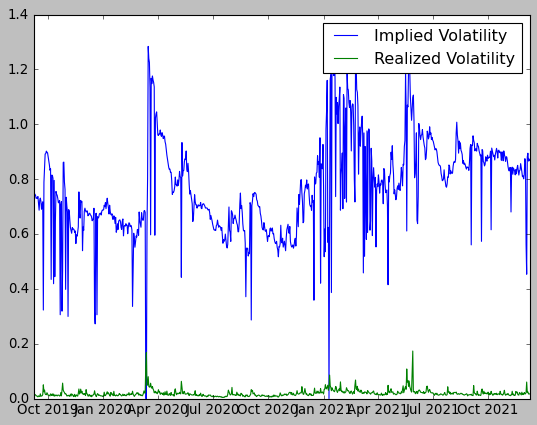

In [10]:
plt.plot(df_iv_rv['iv'], label='Implied Volatility')
plt.plot(df_iv_rv['annualized_vol'], label='Realized Volatility')
plt.legend()
plt.show()

In [11]:
df_iv_rv['iv_normalized'] = df_iv_rv['iv'] / df_iv_rv['iv'].max()
df_iv_rv['rv_normalized'] = df_iv_rv['annualized_vol'] / df_iv_rv['annualized_vol'].max()

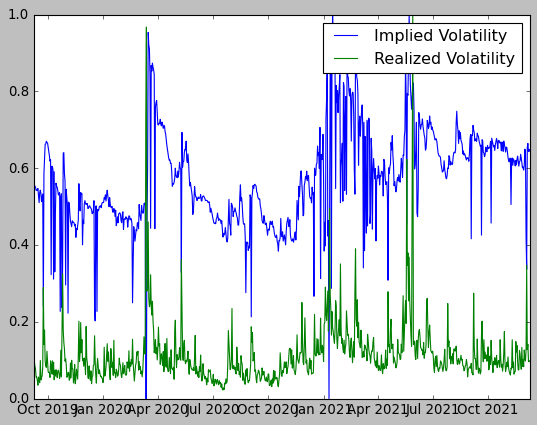

In [12]:
plt.plot(df_iv_rv['iv_normalized'], label='Implied Volatility')
plt.plot(df_iv_rv['rv_normalized'], label='Realized Volatility')
plt.legend()
plt.show()

In [14]:
df_iv_rv[df_iv_rv['iv'] == 0].count()

iv                3
vol               3
annualized_vol    3
close             3
log_return        3
iv_normalized     3
rv_normalized     3
dtype: int64

In [ ]:
df_iv_rv['iv'] = df_iv_rv['iv'].replace(to_replace=0, method='ffill')